In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

X, y = mnist["data"], mnist["target"]

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [7]:
some_digit = X[51301]

In [8]:
other_digit = X[36000]

In [9]:
some_digit_img = some_digit.reshape(28, 28)

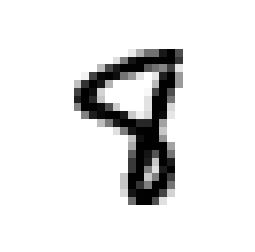

In [10]:
plt.imshow(some_digit_img, cmap=matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
y[36000]

5.0

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
import numpy as np

In [14]:
shuffle_index = np.random.permutation(60000)

In [15]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier 

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [19]:
sgd_clf.predict([other_digit])

array([False], dtype=bool)

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.971  ,  0.93875,  0.96475])

In [22]:
from sklearn.base import BaseEstimator

In [23]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [24]:
never_5_clf = Never5Classifier()

In [25]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.91265,  0.9055 ,  0.9108 ])

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

#### Confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_5, y_train_pred)

array([[53288,  1291],
       [ 1219,  4202]])

In [45]:
from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(y_train_5, y_train_pred)

0.7649736027671582

In [32]:
recall_score(y_train_5, y_train_pred)

0.77513373916251616

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                            method="decision_function")

### ROC Curve

In [34]:
from sklearn.metrics import roc_curve

In [35]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False PositiveRate")
    plt.ylabel("True Positive Rate")

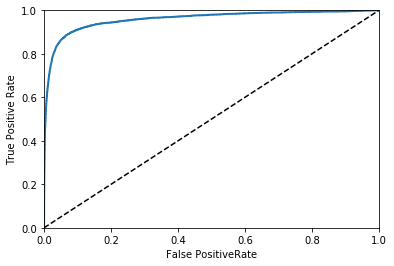

In [37]:
plot_roc_curve(fpr, tpr)

#### AUC

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(y_train_5, y_scores)

0.95940152435594783

### Random Forest Clf

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
forest_clf = RandomForestClassifier(random_state=42)

In [42]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

In [43]:
y_preds_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict")

In [44]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

In [45]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

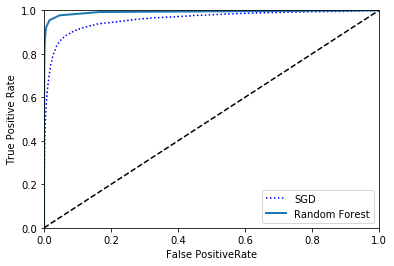

In [46]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [47]:
roc_auc_score(y_train_5, y_scores_forest)

0.99232115011980526

In [48]:
y_train_5

array([False, False, False, ...,  True, False, False], dtype=bool)

In [49]:
precision_score(y_train_5, y_preds_forest)

0.98338870431893688

In [50]:
recall_score(y_train_5, y_preds_forest)

0.81903707802988379

### Multiclass Classification

In [51]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [52]:
sgd_clf.predict([some_digit])

array([ 4.])

In [53]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [54]:
some_digit_scores

array([[-591844.56260385, -538460.40069862, -295029.09467106,
        -288548.96458427,  -44681.09870009, -141409.72124735,
        -489066.86578692, -419940.4843445 , -144656.78182587,
        -207794.82780456]])

In [55]:
np.argmax(some_digit_scores)

4

In [56]:
sgd_clf.classes_[8]

8.0

In [57]:
from sklearn.multiclass import OneVsOneClassifier

In [58]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [59]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False),
          n_jobs=1)

In [60]:
ovo_clf.predict([other_digit])

array([ 5.])

In [61]:
len(ovo_clf.estimators_)

45

In [62]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [63]:
forest_clf.predict([some_digit])

array([ 8.])

In [64]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.9,  0.1]])

In [65]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.88517297,  0.86909345,  0.87098065])

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [69]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([ 0.90981804,  0.9060953 ,  0.91358704])

In [70]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [71]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [72]:
conf_mx

array([[5733,    2,   20,    8,   10,   50,   43,   12,   42,    3],
       [   1, 6472,   50,   27,    5,   35,    9,   11,  121,   11],
       [  61,   41, 5330,   99,   80,   23,  107,   53,  149,   15],
       [  52,   41,  141, 5343,    2,  230,   35,   57,  136,   94],
       [  24,   26,   37,    9, 5361,    8,   59,   35,   86,  197],
       [  66,   38,   30,  183,   68, 4627,  111,   35,  168,   95],
       [  30,   21,   41,    2,   43,   81, 5649,    6,   45,    0],
       [  21,   16,   72,   30,   50,   12,    5, 5813,   18,  228],
       [  50,  153,   75,  161,   15,  161,   56,   22, 5023,  135],
       [  45,   33,   28,   88,  174,   31,    3,  221,   87, 5239]])

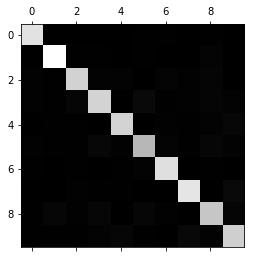

In [73]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [74]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [75]:
norm_conf_mx = conf_mx / row_sums

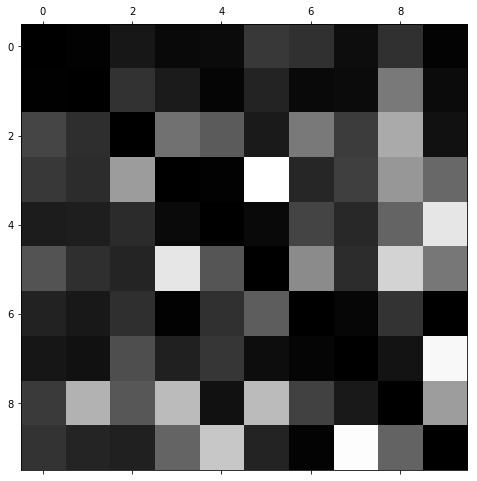

In [76]:
np.fill_diagonal(norm_conf_mx, 0)
plt.figure(figsize=(8,12))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray, fignum=1)

### Multilabel Classification

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
y_train_large = (y_train >= 7)

In [79]:
y_train_odd = (y_train % 2 == 1)

In [80]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [81]:
knn_clf = KNeighborsClassifier()

In [82]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
knn_clf.predict([other_digit])

array([[False,  True]], dtype=bool)

In [ ]:
knn_clf.predict([some_digit])

array([[ True, False]], dtype=bool)

In [ ]:
# evaluate classifier
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

### Multioutput Classification

In [16]:
noise = np.random.randint(0, 100, (len(X_train), 784))

In [17]:
X_train_mod = X_train + noise

In [20]:
noise = np.random.randint(0, 100, (len(X_test), 784))

In [21]:
X_test_mod = X_test + noise

In [22]:
y_train_mod = X_train
y_test_mod = X_test

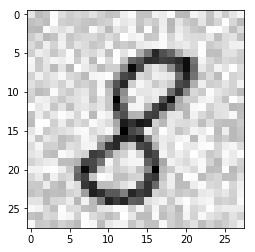

In [29]:
plt.imshow(X_train_mod[36000].reshape((28,28)), cmap=plt.cm.gray_r)

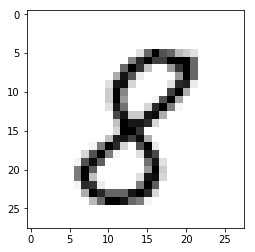

In [30]:
plt.imshow(y_train_mod[36000].reshape((28, 28)), cmap=plt.cm.gray_r)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_clf = KNeighborsClassifier()

In [33]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
clean_digit = knn_clf.predict([X_test[5000]])

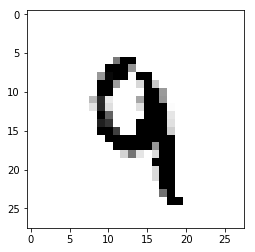

In [37]:
plt.imshow(clean_digit.reshape((28, 28)), cmap=plt.cm.gray_r)

In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
grid_params = {"n_neighbors": [2, 5, 7, 10, 15, 20],
               "weights": ["uniform", "distance"]}

In [41]:
gcv = GridSearchCV(knn_clf, param_grid=grid_params, cv=3, n_jobs=-1)

In [46]:
gcv.fit(X_train, y_train)

KeyboardInterrupt: 